## AUTHOR - Simran Sharma

## The Sparks Foundation

# GripOctober21

# TASK 1 - PREDICTION USING Supervised ML

# Level - Beginner

The task is to predict the percentage of  student based on the Number of study hours.It is a simple linear regression involving just 2 variables.What will be the predicted score if a student studies for 9.25 hrs/day?
 


# __Importing the Relevant Libraries__

In [1]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

import seaborn as sns
from scipy.stats import probplot

# __Loading the Data And Visualizing the Data Frame__

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Graphical Univariate Analysis
__For univariate analysis, the plots used here are Histogram, density plot, boxplot,violinplot and Normal Q-Q plot. These plots play a major role in understanding the distribution of the data points and the presence of outliers.__

__A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side__

Text(0.5, 1.0, "Q-Q plot of 'Scores'")

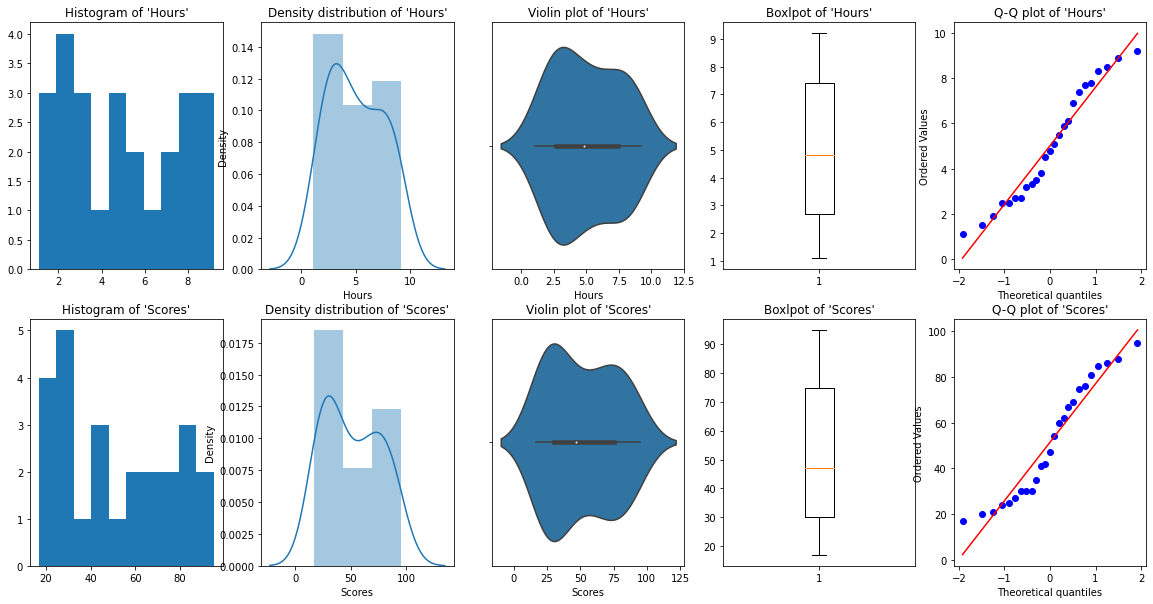

In [3]:
import warnings
warnings.filterwarnings('ignore')

# histogram
data = pd.read_csv('http://bit.ly/w-data')
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
plt.hist(data['Hours'], density=False)
plt.title("Histogram of 'Hours'")
plt.subplot(2,5,6)
plt.hist(data['Scores'], density=False)
plt.title("Histogram of 'Scores'")


# Density plot
plt.subplot(2,5,2)
sns.distplot(data['Hours'], kde=True)
plt.title("Density distribution of 'Hours'")
plt.subplot(2,5,7)
sns.distplot(data['Scores'], kde=True)
plt.title("Density distribution of 'Scores'")


#violinplot
plt.subplot(2,5,3)
sns.violinplot(data['Hours'])
plt.title("Violin plot of 'Hours'")
plt.subplot(2,5,8)
sns.violinplot(data['Scores'])
plt.title("Violin plot of 'Scores'")

#Boxplot
plt.subplot(2,5,4)
plt.boxplot(data['Hours'])
plt.title("Boxlpot of 'Hours'")
plt.subplot(2,5,9)
plt.boxplot(data['Scores'])
plt.title("Boxlpot of 'Scores'")
plt.subplot(2,5,9)



# Normal Q-Q plot
plt.subplot(2,5,5)
probplot(data['Hours'], plot=plt)
plt.title("Q-Q plot of 'Hours'")
plt.subplot(2,5,10)
probplot(data['Scores'], plot=plt)
plt.title("Q-Q plot of 'Scores'")

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# __Exploring the Data__

__Checking, if there is any correlation between the 2 variables.Correlation =0.98, which is a high positive correlation. This means the dependent variable increases as the independent variable increases.__

In [5]:
print("Correlation: "+ 'n', data.corr()) 


Correlation: n            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


__Heatmap of correlation Matrix__

<AxesSubplot:>

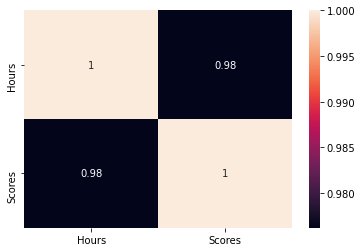

In [6]:
plt.subplot(1,1,1)
sns.heatmap(data.corr(), annot=True)

__Scatter Plot__

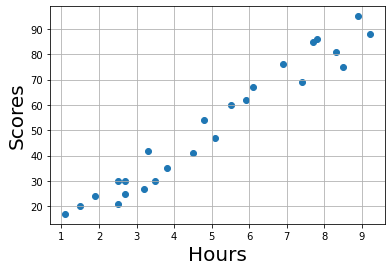

In [7]:
x1=data['Hours']
y=data['Scores']
plt.scatter(x1,y)
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.grid()
plt.show()


# Adding a Constant

In [8]:
x=sm.add_constant(x1)
x.head(8)

,const,Hours
0,1.0,2.5
1,1.0,5.1
2,1.0,3.2
3,1.0,8.5
4,1.0,3.5
5,1.0,1.5
6,1.0,9.2
7,1.0,5.5


## __Displaying the Regression Results__
__Here,result variable will contain the output of the ordinary least squares regression, or OLS.Ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. As arguments, dependent variable y and the newly defined x are passed. At last, .fit() method is used that applies a specific estimation technique to obtain the fit of the model.__

In [9]:
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           9.13e-17
Time:                        00:46:21   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluating the model
__From the sample model, we can interpret that around 95% of dependent variability can be explained by the model, and adjusted R Square is roughly the same as R Square meaning the model is quite robust.__

In [10]:
a=result.rsquared
b=result.rsquared_adj
print('R Square :',a)
print('Adjusted R Square :',b)

R Square : 0.9529481969048356
Adjusted R Square : 0.9509024663354806


# __Plotting the Regression line__

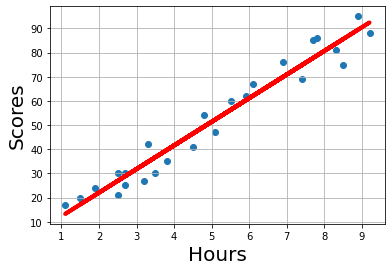

In [11]:
plt.scatter(x1,y)
yhat=2.4837+x1*9.7758
fig=plt.plot(x1,yhat,lw=4,c='red',label='regression line')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.grid()

# Making Predictions
__Comparing Actual vs Predicted__

In [12]:
mydata = {'Hours':x1,' Actual Scores':y, 'Predicted Scores': yhat}
df = pd.DataFrame(mydata)
print(df.head(8))

   Hours   Actual Scores  Predicted Scores
0    2.5              21          26.92320
1    5.1              47          52.34028
2    3.2              27          33.76626
3    8.5              75          85.57800
4    3.5              30          36.69900
5    1.5              20          17.14740
6    9.2              88          92.42106
7    5.5              60          56.25060


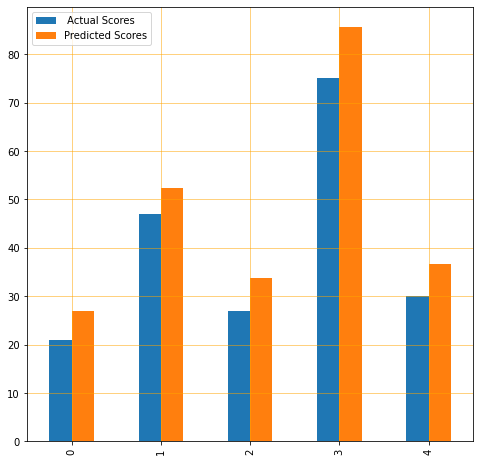

In [13]:
dataset = {' Actual Scores':y, 'Predicted Scores': yhat}
df2 = pd.DataFrame(dataset)
df2[0:5].plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

In [14]:
Hours=9.25
predicted_score=2.4837+Hours*9.7758
print("No of Hours:", Hours)
print("Predicted Scores:" , predicted_score)

No of Hours: 9.25
Predicted Scores: 92.90985


# __CONCLUSION__:
Successful Implementation of  the task is done.
